<a href="https://colab.research.google.com/github/licciard/fun-stuff/blob/main/math/stieltjes2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load previous calculated constants

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
DATA_PATH = "/content/gdrive/My Drive/Colab Notebooks/math/gammas"

import pickle
pickle_in = open(DATA_PATH+'/gammas_digits1000_n100000.pkl', 'rb')
txt_gammas = pickle.load(pickle_in)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Modules

In [ ]:
import mpmath as mp
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import math
import scipy.special as scp

#mp.dps = 15; mp.pretty = True

%matplotlib inline

gammas = [mp.mpf(g) for g in txt_gammas]
N = len(gammas)
print("Type: {}, Length: {}, First element: {}".format(type(gammas),len(gammas),gammas[0]))

Type: <class 'list'>, Length: 100001, First element: 0.577215664901533


Plot Stieltjes gamma_n vs n

In [ ]:
def log_upper_bound(x, d=1e-4, a=0, b=0, c=0):
  return (x+a)*np.log(np.log(x+b)+c)+np.log(d)

def log_upper_bound_add(x, d=1e-4, a=np.e,b=0,c=1):
  return x*np.log(np.log(x+a))+np.log(d) + c/(x+b)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


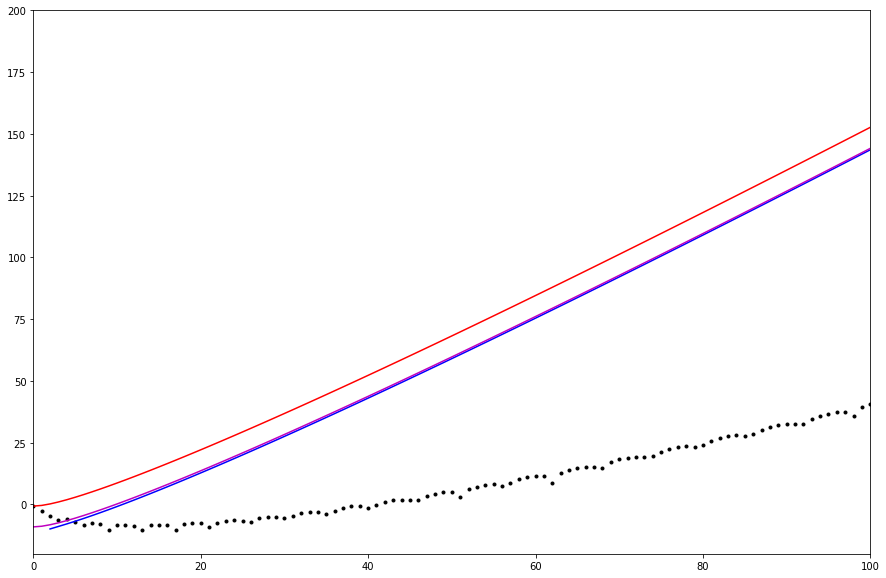

In [ ]:

dn = np.arange(0,N,1)
gn = np.array([mp.log(-gammas[n]) if float(gammas[n]) < 0 else mp.log(gammas[n]) for n in dn])
#gnp = np.array([mp.log(gammas[n]) if float(gammas[n]) > 0 else 0 for n in dn])
#gnn = np.array([mp.log(-gammas[n]) if float(gammas[n]) < 0 else 0 for n in dn])
mun = np.array([log_upper_bound(n,1e-4) for n in dn])
#muon = np.array([log_upper_bound(n+10.25,1e-4) for n in dn])
mutn = np.array([log_upper_bound(n,5e-1,0,np.e) for n in dn])
mutn2 = np.array([log_upper_bound_add(n,1e-4,np.e,10,1) for n in dn])

plt.figure(figsize=(15,10))
plt.plot(dn, gn, 'k.')
#plt.plot(dn, gnp, 'b.')
#plt.plot(dn, gnn, 'r.')
plt.plot(dn, mun, 'b-')
#plt.plot(dn, muon, 'g-')
plt.plot(dn, mutn, 'r-')
plt.plot(dn, mutn2, 'm-')

axes = plt.gca()
axes.set_xlim([0,100])
axes.set_ylim([-20,200])
plt.show()


In [ ]:
def ub_mod_eta(k,const,delta1,delta2):
  tot = 0.
  for h in range(1,k+1):
    tot += scp.binom(k,h)*(np.log(k-h+delta1)**(k-h+delta2*h))*(h**(k-h-1))*(const**h)
  return tot/scp.gamma(k)

for k in range(2,100):
  print("ub_mod_eta({}) = {}".format(k-1,ub_mod_eta(k,1e-4,np.e,0)))

ub_mod_eta(1) = 0.0002626573375036446
ub_mod_eta(2) = 0.00036106680415013494
ub_mod_eta(3) = 0.000353475704660548
ub_mod_eta(4) = 0.00027436314197589975
ub_mod_eta(5) = 0.00017834521670073627
ub_mod_eta(6) = 0.00010040172720230163
ub_mod_eta(7) = 5.009526369472099e-05
ub_mod_eta(8) = 2.254466265235058e-05
ub_mod_eta(9) = 9.289308995932574e-06
ub_mod_eta(10) = 3.55761240740662e-06
ub_mod_eta(11) = 1.2899309008496723e-06
ub_mod_eta(12) = 4.5439817430411965e-07
ub_mod_eta(13) = 1.6125139431430835e-07
ub_mod_eta(14) = 6.010717122082572e-08
ub_mod_eta(15) = 2.423253890645737e-08
ub_mod_eta(16) = 1.0546904548384912e-08
ub_mod_eta(17) = 4.818893464705009e-09
ub_mod_eta(18) = 2.2377402612155035e-09
ub_mod_eta(19) = 1.0326457992607001e-09
ub_mod_eta(20) = 4.684652893507339e-10
ub_mod_eta(21) = 2.0845808127150903e-10
ub_mod_eta(22) = 9.128923506545365e-11
ub_mod_eta(23) = 3.96135154467493e-11
ub_mod_eta(24) = 1.7181548955230014e-11
ub_mod_eta(25) = 7.51402579911752e-12
ub_mod_eta(26) = 3.3358418